# Clasificación de Tweets de desastres naturales

## Enunciado

En esta competición, se plantea la construcción de un modelo de aprendizaje automático que realice predicciones sobre qué Tweets tratan de desastres reales y cuáles no.

https://www.kaggle.com/vstepanenko/disaster-tweets

## 0. Imports

In [2]:
import matplotlib.pyplot as plt
# plt.style.use('ggplot')
plt.style.use('seaborn-v0_8-darkgrid')
import numpy as np
import os

## 1. Lectura del conjunto de datos

In [3]:
import pandas as pd

X_train = pd.read_csv('archive/train.csv')
X_test = pd.read_csv('archive/test.csv')

X_train

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [ ]:
X_test

## 2. Visualización del conjunto de datos

In [4]:
print("Tamaño del conjunto de datos de entrenamiento: ", len(X_train))
print("Tamaño del conjunto de datos de pruebas: ", len(X_test))

Tamaño del conjunto de datos de entrenamiento:  7613
Tamaño del conjunto de datos de pruebas:  3263


In [5]:
# Tweets de cada tipo que se encuentran en el conjunto de datos de entrenamiento
X_train['target'].value_counts()

target
0    4342
1    3271
Name: count, dtype: int64

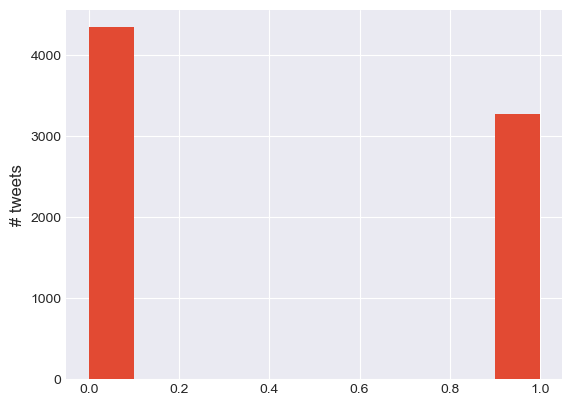

In [6]:
X_train['target'].hist()
plt.ylabel("# tweets")
plt.show()

Siempre conveniente realizar un análisis exploratorio de la distribución de los datos para determinar la mejor manera de resolver el problema

### Número de palabras por Tweet

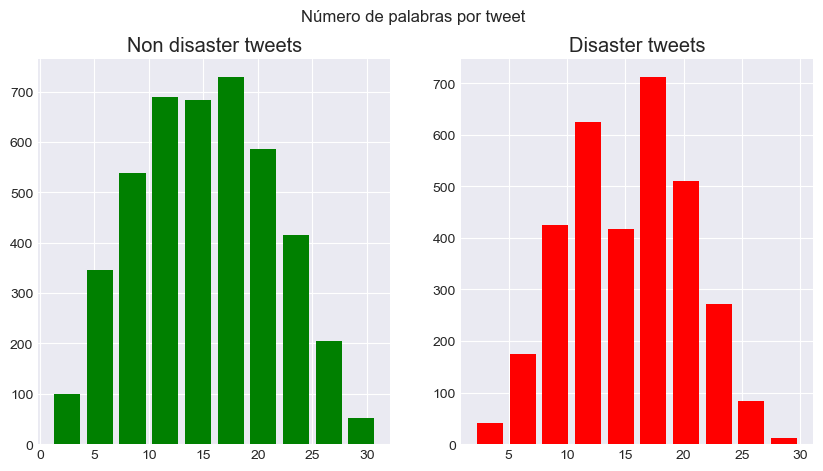

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

# Calculamos el número de palabras
tweet_len_0 = X_train[X_train['target'] == 0]['text'].str.split().map(lambda x: len(x))
tweet_len_1 = X_train[X_train['target'] == 1]['text'].str.split().map(lambda x: len(x))

ax1.hist(tweet_len_0, color='green', rwidth=0.8)
ax1.set_title('Non disaster tweets')

ax2.hist(tweet_len_1, color='red', rwidth=0.8)
ax2.set_title('Disaster tweets')

fig.suptitle('Número de palabras por tweet')

plt.show()

### Número de palabras únicas por Tweet

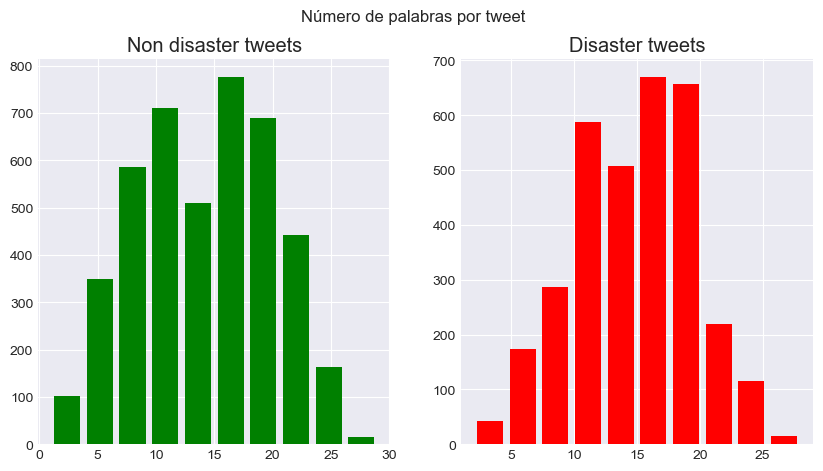

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

# Calculamos el número de palabras
tweet_len_0 = X_train[X_train['target'] == 0]['text'].str.split().map(lambda x: len(set(x)))
tweet_len_1 = X_train[X_train['target'] == 1]['text'].str.split().map(lambda x: len(set(x)))

ax1.hist(tweet_len_0, color='green', rwidth=0.8)
ax1.set_title('Non disaster tweets')

ax2.hist(tweet_len_1, color='red', rwidth=0.8)
ax2.set_title('Disaster tweets')

fig.suptitle('Número de palabras por tweet')

plt.show()

### Longitud media de las palabras por Tweet

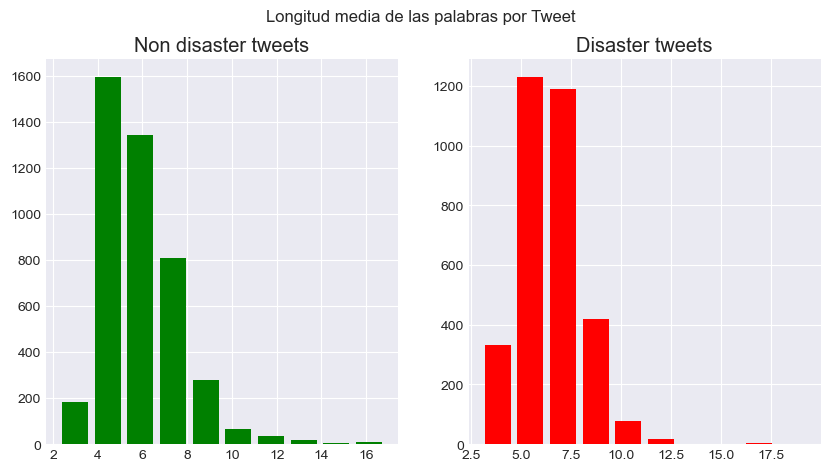

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

# Calculamos el número de palabras
tweet_len_0 = X_train[X_train['target'] == 0]['text'].str.split().map(lambda x: np.mean([len(i) for i in x]))
tweet_len_1 = X_train[X_train['target'] == 1]['text'].str.split().map(lambda x: np.mean([len(i) for i in x]))

ax1.hist(tweet_len_0, color='green', rwidth=0.8)
ax1.set_title('Non disaster tweets')

ax2.hist(tweet_len_1, color='red', rwidth=0.8)
ax2.set_title('Disaster tweets')

fig.suptitle('Longitud media de las palabras por Tweet')

plt.show()

### Número de caracteres por tweet

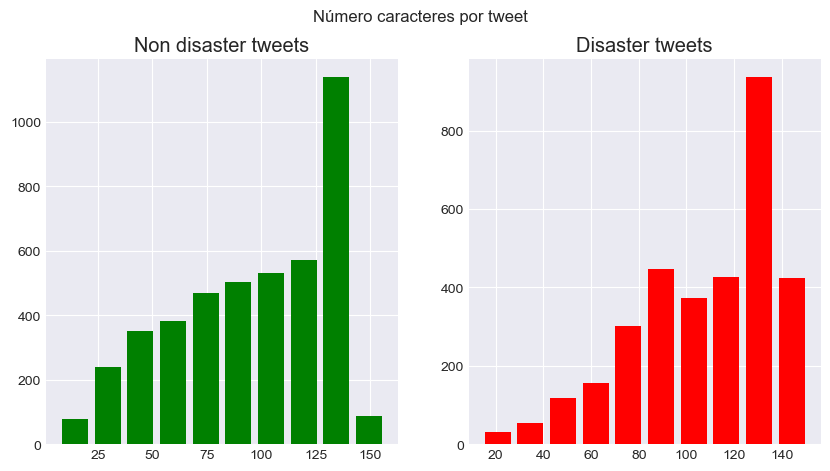

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

# Calculamos el número de caracteres por tweet
tweet_len_0 = X_train[X_train['target'] == 0]['text'].str.len()
tweet_len_1 = X_train[X_train['target'] == 1]['text'].str.len()

ax1.hist(tweet_len_0, color='green', rwidth=0.8)
ax1.set_title('Non disaster tweets')

ax2.hist(tweet_len_1, color='red', rwidth=0.8)
ax2.set_title('Disaster tweets')

fig.suptitle('Número caracteres por tweet')

plt.show()

Podríamos seguir calculando características de entrada como las siguientes:
* Número de palabras de fin por Tweet
* Número de urls por Tweet
* Media de caracteres por Tweet
* Número de caracteres por Tweet
* Número de signos de puntuación por Tweet
* Número de hashtags por Tweet
* Número de @ por tweet

### Stopwords más utilizadas

Estas palabras no tienen un significado por si solas, sino que modifican o acompañan a otras, este grupo suele estar conformado por artículos, pronombres, preposiciones, adverbios e incluso algunos verbos.

En el procesamiento de datos en lenguaje natural son filtradas antes o después del proceso en si, no se consideran por su nulo significado, en el caso de los buscadores como Google no lo consideran al momento de posicionar, pero si al momento de mostrar los resultados de búsqueda.

In [14]:
from nltk.corpus import stopwords

In [15]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [21]:
def plot_stopwords(label: int):
    stop_words = stopwords.words('english')
    tweets_stopwords = {}
    for words in X_train[X_train['target'] == label]['text'].str.split():
        sw = list(set(words).intersection(stop_words))
        for w in sw:
            if w in tweets_stopwords.keys():
                tweets_stopwords[w] += 1
            else:
                tweets_stopwords[w] = 1
                
    top = sorted(tweets_stopwords.items(), key=lambda x:x[1],reverse=True)[:10]
    plt.bar(*zip(*top))
    plt.show()

[('the', 1160), ('to', 949), ('a', 919), ('of', 752), ('and', 746)]


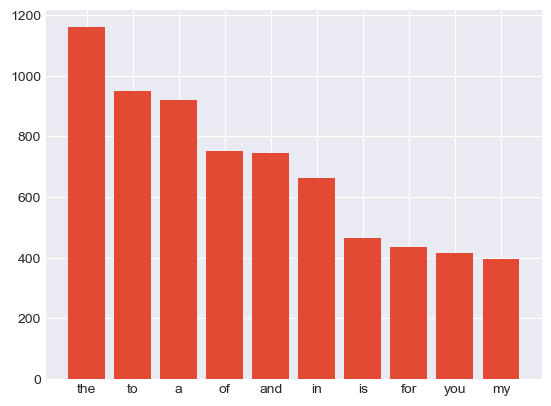

In [22]:
plot_stopwords(0)

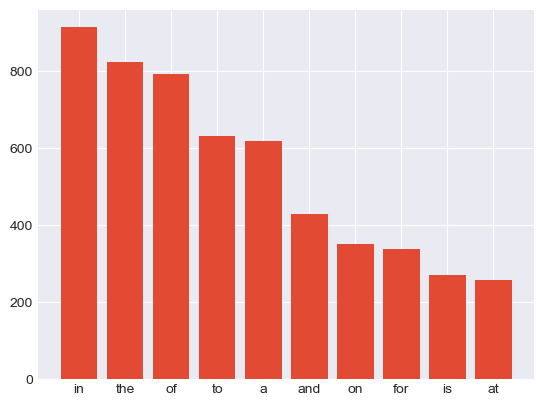

In [18]:
plot_stopwords(1)

### Análisis signos de puntuación

In [38]:
import string

def plot_punctuation(label):
    tweets_stopwords = {}
    for words in X_train[X_train['target'] == label]['text'].str.split():
        sw = list(set(words).intersection(string.punctuation))
        for w in sw:
            if w in tweets_stopwords.keys():
                tweets_stopwords[w] += 1
            else:
                tweets_stopwords[w] = 1
                
    top = sorted(tweets_stopwords.items(), key=lambda x:x[1],reverse=True)[:20]
    plt.figure(figsize=(10, 5))
    plt.bar(*zip(*top))
    plt.show()

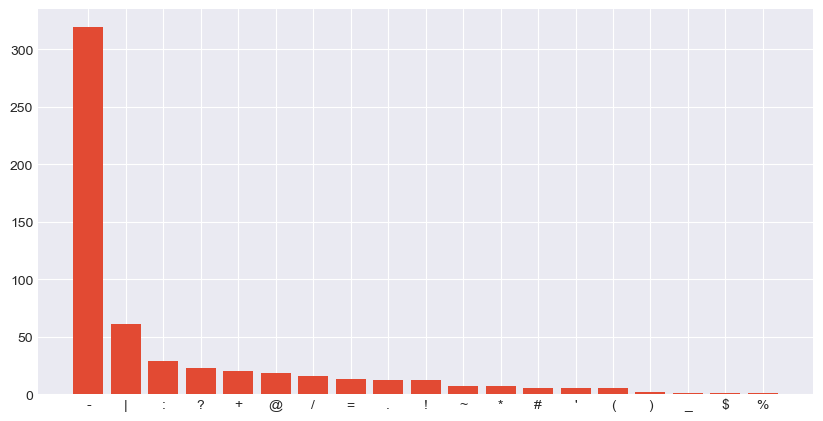

In [39]:
plot_punctuation(0)

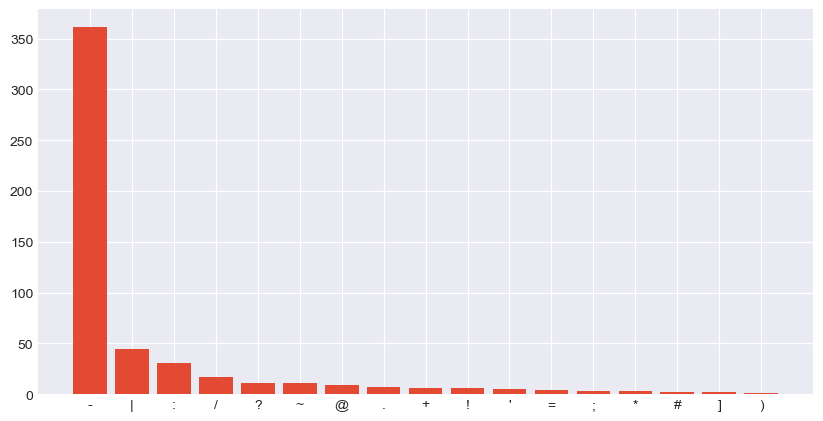

In [40]:
plot_punctuation(1)

### Análisis de Ngramas

In [41]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(ngram_range=(2, 2))
sum_words = cv.fit_transform(X_train['text']).sum(axis=0)

# Calculamos 
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)[:20]

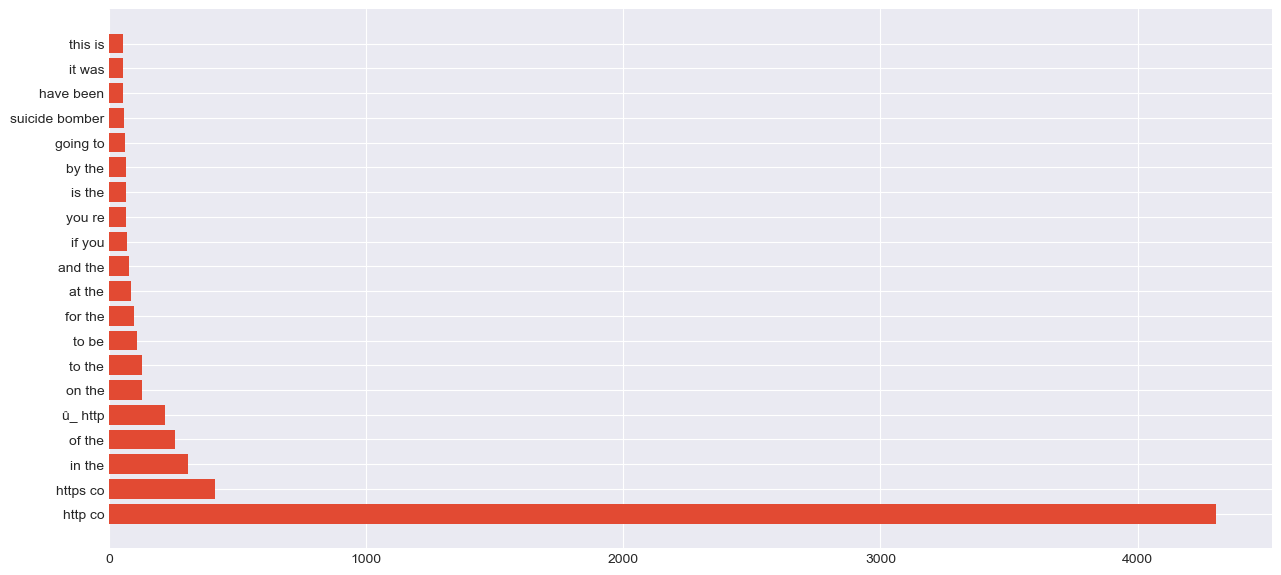

In [42]:
plt.figure(figsize=(15, 7))
plt.barh(*zip(*words_freq))
plt.show()

## 3. Limpieza del conjunto de datos

In [43]:
import re

In [44]:
def remove_url(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'', text)

In [45]:
remove_url("Esto es una prueba: http://localhost:8888/notebooks/Desktop/Workspace/Deep%20Neural%20Networks%20Course/11.%20Consideraciones%20de%20un%20proyecto%20de%20Deep%20Learning/code/Disaster%20Tweets.ipynb")

'Esto es una prueba: '

In [46]:
from html.parser import HTMLParser

class HTMLStripper(HTMLParser):
    def __init__(self):
        self.reset()
        self.strict = False
        self.convert_charrefs = True
        self.fed = []
        
    def handle_data(self, d):
        self.fed.append(d)
        
    def get_data(self):
        return ''.join(self.fed)

def remove_html(text):
    s = HTMLStripper()
    s.feed(text)
    return s.get_data()

In [47]:
remove_html('<tr><td align="left"><a href="../../issues/51/16.html#article">Phrack World News</a></td>')

'Phrack World News'

In [48]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [49]:
remove_emoji("Omg another Earthquake 😔😔")

'Omg another Earthquake '

In [50]:
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

In [51]:
remove_punctuation("hola #que tal")

'hola que tal'

In [53]:
# Aplicamos nuestras funciones de limpieza del conjunto de datos
X_train_prep = X_train.copy()

X_train_prep['text'] = X_train['text'].apply(remove_url)
X_train_prep['text'] = X_train_prep['text'].apply(remove_html)
X_train_prep['text'] = X_train_prep['text'].apply(remove_emoji)
X_train_prep['text'] = X_train_prep['text'].apply(remove_punctuation)

In [54]:
# Aplicamos nuestras funciones de limpieza del conjunto de datos
X_test_prep = X_test.copy()

X_test_prep['text'] = X_test['text'].apply(remove_url)
X_test_prep['text'] = X_test_prep['text'].apply(remove_html)
X_test_prep['text'] = X_test_prep['text'].apply(remove_emoji)
X_test_prep['text'] = X_test_prep['text'].apply(remove_punctuation)

In [55]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(ngram_range=(2, 2))
sum_words = cv.fit_transform(X_train_prep['text']).sum(axis=0)

# Calculamos
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)[:20]

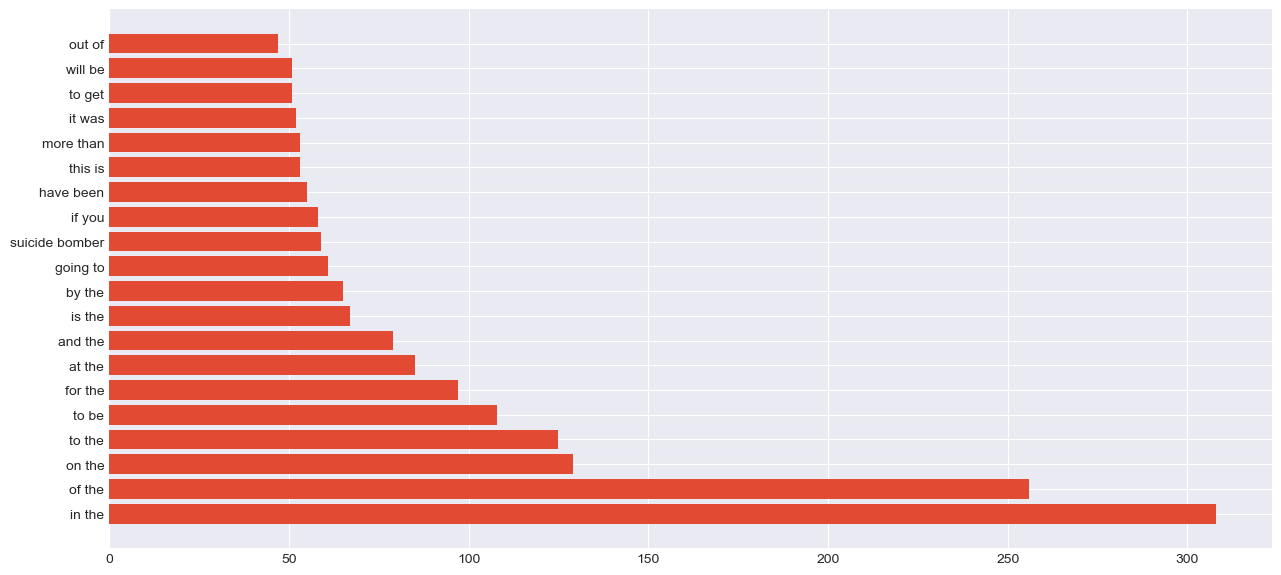

In [56]:
plt.figure(figsize=(15, 7))
plt.barh(*zip(*words_freq))
plt.show()

## 4. Vectorización del conjunto de datos

In [57]:
Y_train = X_train_prep['target']

In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

X_train = vectorizer.fit_transform(X_train_prep['text'])

In [59]:
X_train = X_train.toarray()

In [60]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [61]:
X_test = vectorizer.transform(X_test_prep['text'])
X_test = X_test.toarray()

## 5. División del conjunto de datos

In [62]:
from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.15)

In [63]:
print("Longitud subcojunto de entrenamiento: ", len(X_train))
print("Longitud subconjunto de validación: ", len(X_val))
print("Longitud subconjutno de pruebas: ", len(X_test))

Longitud subcojunto de entrenamiento:  6471
Longitud subconjunto de validación:  1142
Longitud subconjutno de pruebas:  3263


## 6. Construcción del modelo

In [64]:
from tensorflow.keras import models, layers

model = models.Sequential()

model.add(layers.Dense(16, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(1, activation='sigmoid'))

In [65]:
model.compile(
    optimizer='adam', 
    loss='binary_crossentropy',
    metrics=['accuracy', 'Precision']
)

In [66]:
history = model.fit(
    X_train,
    Y_train,
    epochs=20,
    batch_size=1024,
    validation_data=(X_val, Y_val))

Epoch 1/20
7/7 [==============================] - 3s 190ms/step - loss: 0.6922 - accuracy: 0.5554 - precision: 0.4741 - val_loss: 0.6900 - val_accuracy: 0.5902 - val_precision: 1.0000
Epoch 2/20
7/7 [==============================] - 1s 71ms/step - loss: 0.6878 - accuracy: 0.6168 - precision: 0.8966 - val_loss: 0.6852 - val_accuracy: 0.6173 - val_precision: 1.0000
Epoch 3/20
7/7 [==============================] - 0s 71ms/step - loss: 0.6815 - accuracy: 0.6713 - precision: 0.9156 - val_loss: 0.6784 - val_accuracy: 0.6979 - val_precision: 0.9728
Epoch 4/20
7/7 [==============================] - 0s 68ms/step - loss: 0.6727 - accuracy: 0.7342 - precision: 0.8920 - val_loss: 0.6700 - val_accuracy: 0.7329 - val_precision: 0.9366
Epoch 5/20
7/7 [==============================] - 0s 67ms/step - loss: 0.6606 - accuracy: 0.7730 - precision: 0.9028 - val_loss: 0.6601 - val_accuracy: 0.7732 - val_precision: 0.9278
Epoch 6/20
7/7 [==============================] - 0s 67ms/step - loss: 0.6467 - accu

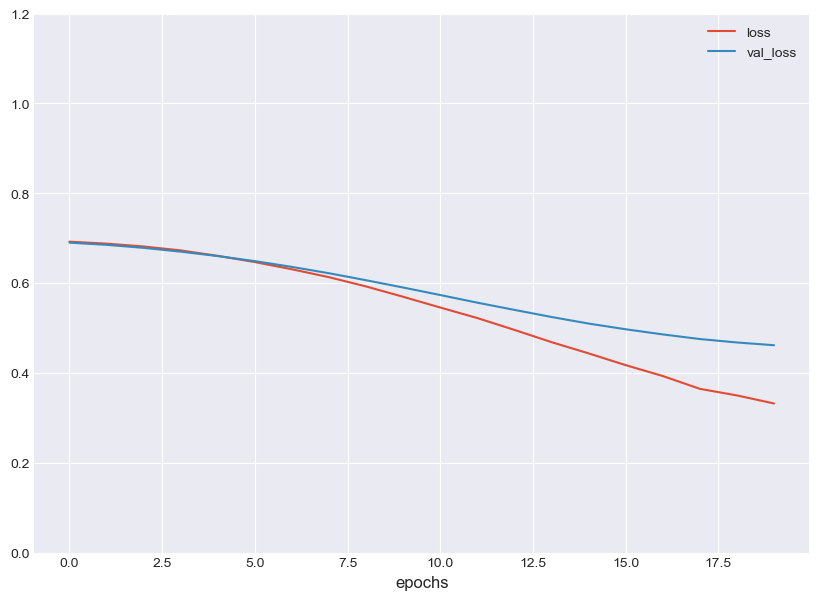

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history)[['loss', 'val_loss']].plot(figsize=(10, 7))
plt.grid(True)
plt.gca().set_ylim(0, 1.2)
plt.xlabel("epochs")
plt.show()

## 7. Evaluación del modelo

In [68]:
Y_pred = model.predict(X_test).round(0)
Y_pred

102/102 [==============================] - 3s 31ms/step


array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

In [69]:
for i in range(30):
    print("{} - {}".format(X_test_prep['text'][i], Y_pred[i]))

Just happened a terrible car crash - [1.]
Heard about earthquake is different cities stay safe everyone - [1.]
there is a forest fire at spot pond geese are fleeing across the street I cannot save them all - [1.]
Apocalypse lighting Spokane wildfires - [1.]
Typhoon Soudelor kills 28 in China and Taiwan - [1.]
Were shakingIts an earthquake - [1.]
Theyd probably still show more life than Arsenal did yesterday eh EH - [0.]
Hey How are you - [0.]
What a nice hat - [0.]
Fuck off - [0.]
No I dont like cold - [0.]
NOOOOOOOOO Dont do that - [0.]
No dont tell me that - [0.]
What if - [0.]
Awesome - [0.]
Birmingham Wholesale Market is ablaze BBC News  Fire breaks out at Birminghams Wholesale Market  - [1.]
sunkxssedharry will you wear shorts for race ablaze  - [0.]
PreviouslyOnDoyinTv Toke MakinwaÛªs marriage crisis sets Nigerian Twitter ablaze  - [1.]
Check these out     nsfw - [0.]
PSA IÛªm splitting my personalities

 techies follow ablazeco
 Burners follow ablaze - [0.]
beware world ablaze